### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

### With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



In [10]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

 ### Data Loading and Exploration 

In [11]:
#load data
data=pd.read_csv('/Users/sangeetha/DataScienceProjects/house-prices-advanced-regression-techniques/train.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
data.shape

(1460, 81)

In [13]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Visualization of salesprice 

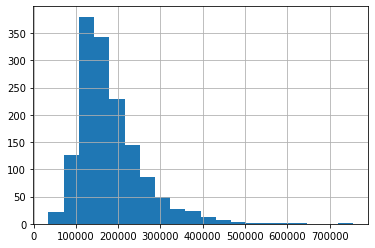

In [14]:
data.SalePrice.hist(bins=20)

## Exploratory Data Analysis

### 1. Basement

In [15]:
basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'
            , 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFinType2'
            , 'BsmtFinSF2', "BsmtFullBath", "BsmtHalfBath"]
print(*basement, sep=", ")

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, BsmtFinType2, BsmtFinSF2, BsmtFullBath, BsmtHalfBath


### 1.1 Numerical features

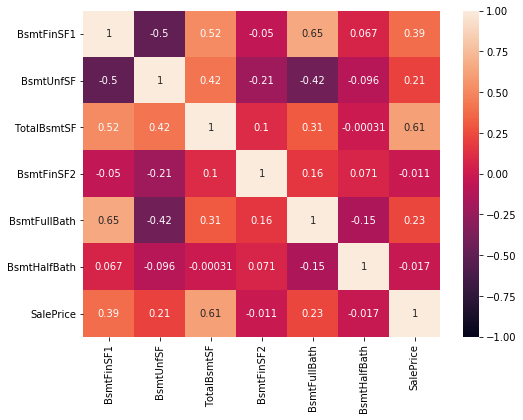

In [16]:
def corr_heatmap(columns=None, saleprice=["SalePrice"], df=data
                 , figsize=(8,6), vmin=-1, vmax=1, showvalue=True):
    columns = df.columns if columns == None else columns + saleprice
    corr = df[columns].corr()
    plt.figure(figsize=figsize)
    return sns.heatmap(corr, vmin=vmin, vmax=vmax, annot=showvalue)
corr_heatmap(basement)

### Visualization of Numerical feature with sales price

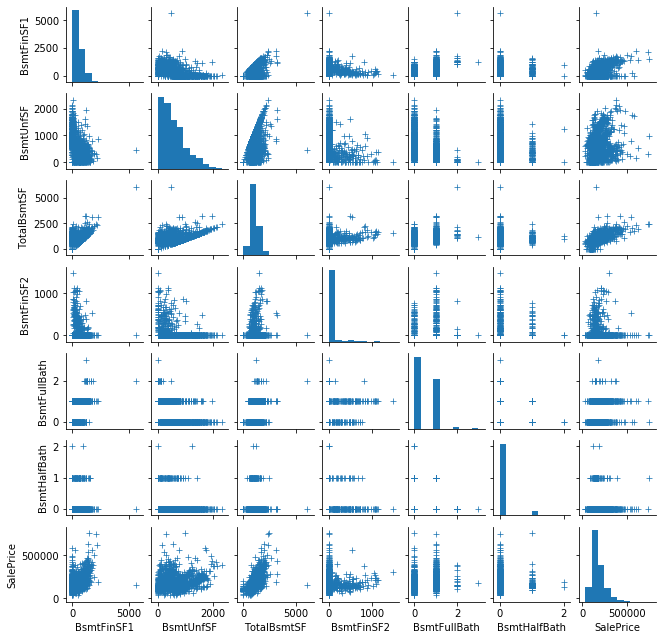

In [17]:
def pairplot(columns, include_sale=True, data=data, kwargs={}):
    if include_sale & ("SalePrice" not in columns):
        columns = columns + ["SalePrice"]
    sns.pairplot(data=data[columns], **kwargs)
pairplot(basement, kwargs={"markers":"+", "height":1.25})


The overall-area variable TotalBsmtSF seems the most linearly predictive. If people are interested in area more than other characteristics of the basement (finished, unfinished, etc.), it may be worth removing the other three area variables BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF to save running time and prevent overfitting. At the end, we will test whether dropping these variables is a good idea. In addition, as for BsmtFinSF1 and BsmtFinSF2, let's see if they are more predictive when combined with BsmtFinType.

It should also be noted that the majority of BsmtHalfBath is 0. Let's convert it to a dummy that evaluates to 0 if there is no basement halfbath and 1 otherwise.

### Data cleaning of train Dataset

In [18]:
# to visulize null values in data
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

###  Visualization to Identify the missing values in the  Training dataset

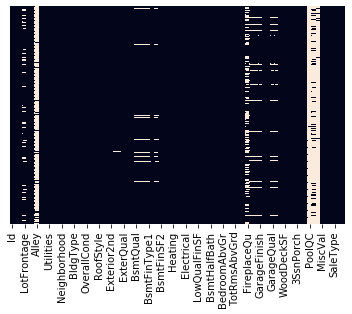

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

### Data Pre-Processing

In [20]:
#to display the column names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
#dropping the columns
data.drop(['Alley'], axis=1, inplace=True)
data.drop(['FireplaceQu'], axis=1, inplace=True)
data.drop(['PoolQC'], axis=1, inplace=True)
data.drop(['Fence'], axis=1, inplace=True)
data.drop(['MiscFeature'], axis=1, inplace=True)
data.drop(['GarageYrBlt'], axis=1, inplace=True)

In [22]:
#filling the missing data numerical
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea']= data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

In [23]:
#filling the missing data discrete
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [24]:
#after Data Cleaning , Checking the data for missing values
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

### Visualization of Heatmap after Data Cleaning and Pre-processing

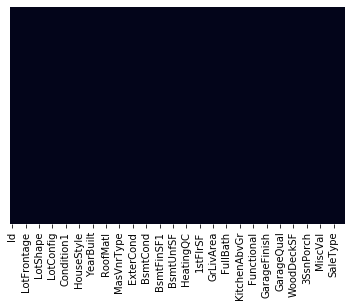

In [25]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

### Copying the train dataset in a dataframe

In [26]:
#copy the train dataframe
train_dataframe=data.copy()

In [27]:
train_dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Data loading and cleaning with test Dataset

In [28]:
data=pd.read_csv('/Users/sangeetha/DataScienceProjects/house-prices-advanced-regression-techniques/test.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [29]:
data.shape

(1459, 80)

In [30]:
# to visulize null values in data
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

### Visualization of missing values in Test Dataset

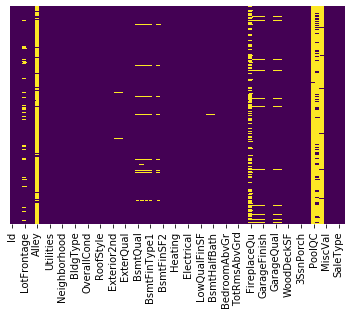

In [31]:
#visualize with heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data Preprocessing of Test dataset

In [32]:
#to display the column names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
#dropping the columns with more than half of missing values
data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','GarageYrBlt'], axis=1, inplace=True)

In [34]:
#filling the missing data numerical
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea']= data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtFinSF1']= data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinSF2']= data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['BsmtUnfSF']= data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['TotalBsmtSF']= data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
data['GarageArea']= data['GarageArea'].fillna(data['GarageArea'].mean())

In [35]:
#filling the missing data discrete
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['BsmtFullBath']=data['BsmtFullBath'].fillna(data['BsmtFullBath'].mode()[0])
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])
data['SaleCondition']=data['SaleCondition'].fillna(data['SaleCondition'].mode()[0])

In [36]:
#after Data Cleaning , Checking the data for missing values
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

In [37]:
data.shape

(1459, 74)

### Visualization of Heatmap after Data Cleaning and Pre-processing

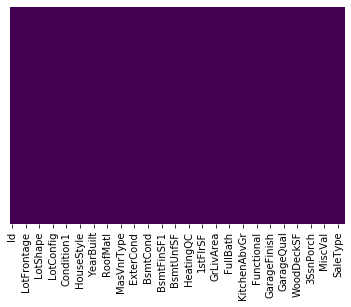

In [38]:
#visualize with heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [40]:
#copy the twat dataframe
test_dataframe=data.copy()

# Merging Train and Test Data and cleaning the combined Dataset

In [41]:
#Concatinating train and test Dataset
combined_dataframe=pd.concat([train_dataframe,test_dataframe],axis=0,sort=True)

In [42]:
combined_dataframe.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
BedroomAbvGr    0
BldgType        0
               ..
Utilities       0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 75, dtype: int64

### After Merging Test and Train dataset, Identified missing values in combined data

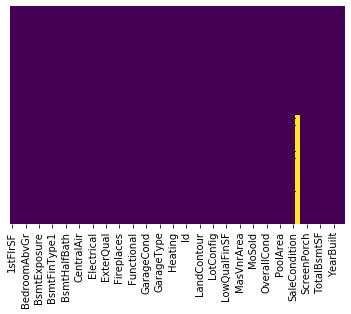

In [43]:
#visualize with heatmap
sns.heatmap(combined_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
combined_dataframe.drop(['SaleCondition'], axis=1, inplace=True)

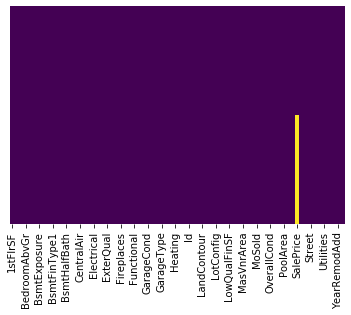

In [45]:
#visualize with heatmap
sns.heatmap(combined_dataframe.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
combined_dataframe['SalePrice'].isna().sum()



1459

In [47]:
combined_dataframe['SalePrice']= combined_dataframe['SalePrice'].fillna(combined_dataframe['SalePrice'].mean())

### Visualizing the heatmap after Cleaning the missing values in combined data

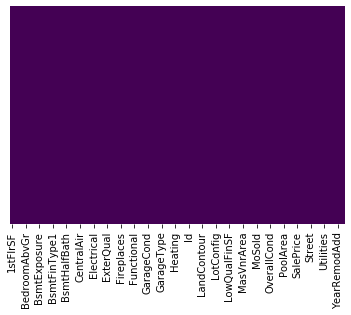

In [48]:
#visualize with heatmap
sns.heatmap(combined_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
combined_dataframe.shape

(2919, 74)

### Converting categorial values to Numerical values

In [50]:
#columns with categorical values
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

### One Hot Enocoding Technique on Categorical values

In [51]:
#onehotcoding to convert categorical values to numerical

def category_onehot_multcols(multcolumns):
    df_final=combined_dataframe
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(combined_dataframe[fields],drop_first=True)
        
        combined_dataframe.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
       
    print(df_final)    
    df_final=pd.concat([combined_dataframe,df_final],axis=1)
        
    return df_final

In [52]:
#calling the onehotcoding function
combined_dataframe = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
      FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  ...  Fa  Gd  Po  TA  Fa  \
0      0   0   1   0     1    0    0    1    0    0  ...   0   0   0   1   0   
1      0   0   1   0     1    0    0    1    0    0  ...   0   0   0   1   0   
2      0   0   1   0     1    0    0    0    0    0  ...   0   0   0   1   0   
3      0   0   1   0     1    0    0    0    0    0  ...   0   0   0   1   0   
4      0   0   1   0     1    0    0    0    0    0  ...   0   0   0   1   0   
...   ..  ..  ..  ..   ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..   
1454   0   0   0   1     1    0    0    1    0 

### Reading the shape of data after one hot encoding

In [53]:
#shape of dataframe after one hot encoding
combined_dataframe.shape

(2919, 228)

### Removing the duplicate column after one hot encoding

In [54]:
# To remove duplicate column
combined_dataframe =combined_dataframe.loc[:,~combined_dataframe.columns.duplicated()]

In [55]:
combined_dataframe.shape

(2919, 172)

### Spliting the Train and Test Dataset using train_test_split method

In [86]:

df_Train=combined_dataframe.iloc[:1460,:]
df_Test=combined_dataframe.iloc[1460:,:]

In [56]:
from sklearn.model_selection import train_test_split
X=combined_dataframe.drop(['SalePrice'],axis=1)
y=combined_dataframe['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2335, 171) (2335,)
(584, 171) (584,)


In [84]:
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
1420,940,610,0,3,0.0,0.0,0.0,0.0,817.0,429,...,0,1,0,0,0,0,0,1,0,1
360,912,0,0,2,773.0,0.0,1.0,0.0,115.0,0,...,0,0,1,1,0,0,0,0,1,0
382,1052,0,0,3,527.0,0.0,0.0,0.0,525.0,0,...,0,0,1,1,0,0,0,0,0,0
311,1382,0,0,3,172.0,483.0,0.0,1.0,727.0,0,...,0,0,1,1,0,0,0,0,0,0
1229,1507,0,0,4,666.0,0.0,0.0,0.0,409.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1195,644,0,4,0.0,0.0,0.0,0.0,1195.0,0,...,0,0,1,1,0,0,0,0,0,0
558,864,0,0,3,764.0,0.0,1.0,0.0,100.0,0,...,0,0,1,0,0,0,0,1,0,0
379,1200,0,0,3,1200.0,0.0,3.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
519,1276,804,0,3,0.0,0.0,0.0,0.0,1276.0,0,...,0,0,1,0,0,0,0,1,0,0


# scaling the Dataset with MinMaxscaler

In [58]:
scaler=MinMaxScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Implementing Random Forest Regressor


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =1000, random_state=42)
rf.fit(scaled_X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [60]:
y_pred = rf.predict(scaled_X_test)

### Train and Test score of random forest model with hyperparameters

In [61]:
print("The Train score of random forest: {:.3f}".format(rf.score(scaled_X_train,y_train)))
print("The Test score of random forest: {:.3f}".format(rf.score(scaled_X_test,y_test)))

The Train score of random forest: 0.978
The Test score of random forest: 0.854


### The fitted hyperparameter is predicted with Test dataset, The actual values and predicted values are extracted in a data frame

In [62]:
#the result of predicted y value to  actual value of y
df= pd.DataFrame(data=[y_pred,y_test])
df

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,583
0,180884.511107,139403.715,180921.19589,180921.19589,147663.482196,180766.93556,163797.678,350450.382,178825.437392,108394.166,...,165610.083392,180921.19589,263709.934196,180921.19589,180920.417519,224599.083588,180921.19589,180900.368715,230673.745,174600.665073
1,180921.195890,156000.000,180921.19589,180921.19589,127000.000000,180921.19589,162000.000,315000.000,169990.000000,98300.000,...,178000.000000,180921.19589,238000.000000,180921.19589,180921.195890,221000.000000,180921.19589,180921.195890,234000.000,180921.195890


# RMSE value for Random Forest Regressor

In [63]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 22692.650577764976


# Implementing Random Froest Regressor with cross validation

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val_score(rf,scaled_X_train,y_train,cv=5).mean()






0.8307780131636736

### The Best suited Hyperparameter  and cv score is Identified

In [65]:
param_grid =  {'n_estimators' : np.arange(1000,4000,1000)}
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(scaled_X_train, y_train)
print("Best Parameter: {}".format(grid.best_params_))
print("best_cv_score: {:.2f}".format(grid.best_score_))
print("train_score: {:.3f}".format(grid.score(scaled_X_train,y_train)))
print("test_score: {:.3f}".format(grid.score(scaled_X_test,y_test)))




Best Parameter: {'n_estimators': 3000}
best_cv_score: 0.83
train_score: 0.979
test_score: 0.851


In [66]:
param_grid =  {'n_estimators' : np.arange(1000,4000,1000)}
grid = GridSearchCV(RandomForestRegressor(random_state=5,
                                max_depth=9,min_samples_split=10,max_features='sqrt',
                                min_samples_leaf=15), param_grid=param_grid, cv=5, )
grid.fit(scaled_X_train, y_train)
print("Best Parameter: {}".format(grid.best_params_))
print("best_cv_score: {:.2f}".format(grid.best_score_))
print("train_score: {:.3f}".format(grid.score(scaled_X_train,y_train)))
print("test_score: {:.3f}".format(grid.score(scaled_X_test,y_test)))

Best Parameter: {'n_estimators': 3000}
best_cv_score: 0.53
train_score: 0.612
test_score: 0.508


### The Best hyperparameter is applied and the model is fitted

In [67]:
gridsearch_rfr=RandomForestRegressor(random_state=5,n_estimators=2000)

gridsearch_rfr.fit(scaled_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

### The fitted hyperparameter is predicted with Test dataset, The actual values and predicted values are extracted in a data frame

In [68]:
y_pred = gridsearch_rfr.predict(scaled_X_test)

In [69]:
df= pd.DataFrame(data=[y_pred,y_test])
df

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,583
0,180796.449313,139720.21,180921.19589,180921.19589,147589.224784,180786.915148,164176.598196,351892.9015,178798.425088,108443.2975,...,166254.650794,180921.19589,264045.490098,180921.19589,180925.424911,224184.638794,180921.19589,180920.868715,227887.161098,174029.867134
1,180921.195890,156000.00,180921.19589,180921.19589,127000.000000,180921.195890,162000.000000,315000.0000,169990.000000,98300.0000,...,178000.000000,180921.19589,238000.000000,180921.19589,180921.195890,221000.000000,180921.19589,180921.195890,234000.000000,180921.195890


# RMSE value for GridSearch Random Forest Regressor

In [70]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 23011.44651784762


# Implementing Gradient Boosting Regressor Technique with grid search

In [71]:
#grid search for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor 
myparam_grid={'n_estimators' : range(1000,4000,1000)}
mygrid = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.05, min_samples_split=10,min_samples_leaf=15,max_depth=4,max_features='sqrt',random_state=5), 
                      param_grid = myparam_grid,iid=False, cv=5)

mygrid.fit(scaled_X_train,y_train)
print("The grid search GradientBoostingRegressor Train Dataset with score: {:.3f}".format(mygrid.score(scaled_X_train,y_train)))
print("The grid search GradientBoostingRegressor Test Dataset with score: {:.3f}".format(mygrid.score(scaled_X_test,y_test)))
print("Best Parameter: {}".format(mygrid.best_params_))
print("best cv accuracy score:{:.2f}".format(mygrid.best_score_))

/Users/sangeetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


The grid search GradientBoostingRegressor Train Dataset with score: 0.993
The grid search GradientBoostingRegressor Test Dataset with score: 0.814
Best Parameter: {'n_estimators': 3000}
best cv accuracy score:0.81


### Gradient Boosting Regressor Technique with hyperparameter is fitted to the model

In [72]:
gbm1 = GradientBoostingRegressor(random_state=5,n_estimators=3000,learning_rate=0.05,
                                max_depth=9,min_samples_split=10,max_features='sqrt',
                                min_samples_leaf=15,loss='huber')
gbm1.fit(scaled_X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### The model is prediced and the score of Train and Test dataset is Identified.

In [73]:
y_pred = gbm1.predict(scaled_X_test)

In [74]:
print("The Train score of random forest: {:.3f}".format(gbm1.score(scaled_X_train,y_train)))
print("The Train score of random forest: {:.3f}".format(gbm1.score(scaled_X_test,y_test)))

The Train score of random forest: 0.967
The Train score of random forest: 0.764


### The fitted hyperparameter Gradient Boosting Regressor is predicted with Test dataset, The actual values and predicted values are extracted in a data frame

In [75]:
df= pd.DataFrame(data=[y_pred,y_test])
df

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,583
0,175537.384279,146377.939968,179144.056387,173546.560601,149004.23288,178842.359281,165459.330132,348811.778788,176622.24483,96109.967148,...,159414.309967,183171.868573,239345.430404,181412.496157,182262.715599,206354.359502,172970.028288,189202.245437,223927.749194,183145.559257
1,180921.195890,156000.000000,180921.195890,180921.195890,127000.00000,180921.195890,162000.000000,315000.000000,169990.00000,98300.000000,...,178000.000000,180921.195890,238000.000000,180921.195890,180921.195890,221000.000000,180921.195890,180921.195890,234000.000000,180921.195890


# RMSE value for GridSearch Gradient Boosting Regressor

In [76]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 28841.506695686872
